# Sentiment Analysis on Reddit News Headlines with Python’s Natural Language Toolkit (NLTK)

In [114]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [115]:
import praw

reddit = praw.Reddit(client_id='KgFBUmRPl1whtw',
                     client_secret='gmOJmuS3iDRwrUnhmn0CYtpnGGY',
                     user_agent='LearnDataSci')

In [112]:
headlines = set()

In [113]:
for submission in reddit.subreddit('politics').new(limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

965


In [131]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': -0.5267,
  'headline': 'DOJ watchdog reportedly sends criminal referral for McCabe to federal prosecutor',
  'neg': 0.254,
  'neu': 0.746,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'House Dems add five candidates to ‘Red to Blue’ program',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'DeveloperTown co-founder launches independent bid for U.S. Senate',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [132]:
df = pd.DataFrame.from_records(results)
df.head()

,compound,headline,neg,neu,pos
0,-0.5267,DOJ watchdog reportedly sends criminal referra...,0.254,0.746,0.000
1,0.0000,House Dems add five candidates to ‘Red to Blue...,0.000,1.000,0.000
2,0.0000,DeveloperTown co-founder launches independent ...,0.000,1.000,0.000
3,0.5267,Japanese PM Praises Trump for North Korea Brea...,0.000,0.673,0.327
4,0.0000,"Democrats Back 'Impeach Trump' Candidates, Pol...",0.000,1.000,0.000


In [133]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,compound,headline,neg,neu,pos,label
0,-0.5267,DOJ watchdog reportedly sends criminal referra...,0.254,0.746,0.000,-1
1,0.0000,House Dems add five candidates to ‘Red to Blue...,0.000,1.000,0.000,0
2,0.0000,DeveloperTown co-founder launches independent ...,0.000,1.000,0.000,0
3,0.5267,Japanese PM Praises Trump for North Korea Brea...,0.000,0.673,0.327,1
4,0.0000,"Democrats Back 'Impeach Trump' Candidates, Pol...",0.000,1.000,0.000,0


In [123]:
df2 = df[['headline', 'label']]

In [124]:
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [119]:
df.label.value_counts()

 0    433
-1    332
 1    200
Name: label, dtype: int64

In [120]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['Japanese PM Praises Trump for North Korea Breakthrough',
 "Bernie Sanders Joins Cory Booker's Marijuana Justice Act to Federally Legalize Weed",
 'Trump Administration Seeks to Expand Sales of Armed Drones',
 'AP: Trump leaves open possibility of bailing on meeting with Kim, Trump supported by Japan',
 'Trump skews reasons behind his 2016 win']

Negative headlines:

['DOJ watchdog reportedly sends criminal referral for McCabe to federal prosecutor',
 'Beyer Statement On Syria Strikes',
 'Trump confidantes Bossie, Lewandowski urge against firing Mueller',
 'Mattis disputes report he wanted Congress to approve Syria strike',
 'Criminal charges recommended for fired FBI official Andrew McCabe']


In [134]:
df.label.value_counts(normalize=True) * 100

 0    44.870466
-1    34.404145
 1    20.725389
Name: label, dtype: float64

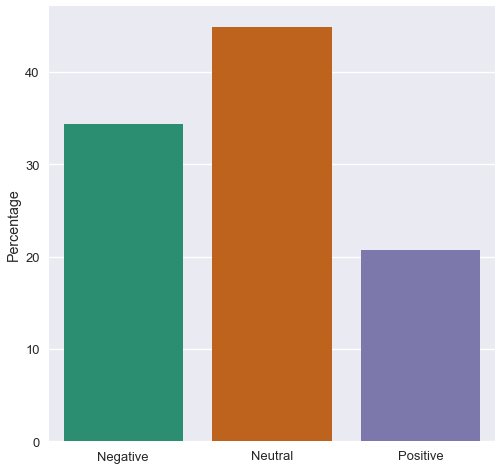

In [135]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [128]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [129]:
tokenizer = RegexpTokenizer(r'\w+')
print(tokenizer.tokenize(example))

['This', 'is', 'an', 'example', 'sentence', 'However', 'it', 'isn', 't', 'a', 'very', 'informative', 'one']


In [138]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers']


In [141]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        line = line.lower()
        toks = tokenizer.tokenize(line)
        toks = [t for t in toks if t not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [142]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('trump', 80),
 ('says', 16),
 ('justice', 13),
 ('new', 13),
 ('senate', 12),
 ('york', 12),
 ('mueller', 11),
 ('comey', 11),
 ('support', 10),
 ('legal', 10),
 ('security', 9),
 ('white', 9),
 ('giuliani', 9),
 ('korea', 8),
 ('party', 8),
 ('donald', 8),
 ('cohen', 8),
 ('state', 8),
 ('like', 8),
 ('join', 8)]

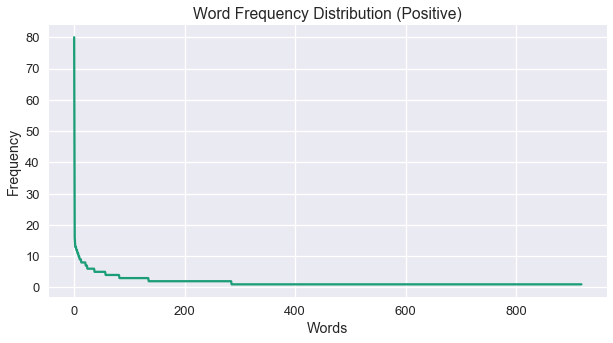

In [143]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

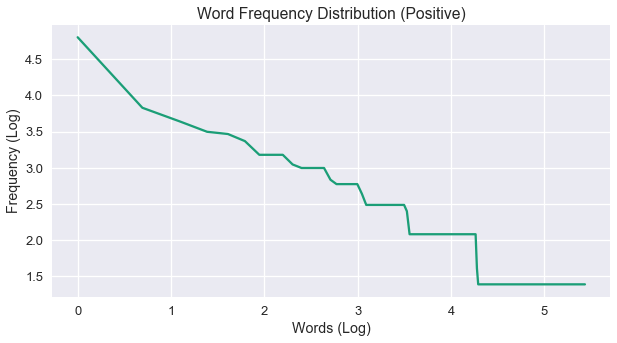

In [144]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [145]:
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('trump', 125),
 ('mueller', 25),
 ('criminal', 21),
 ('judge', 20),
 ('mccabe', 19),
 ('court', 18),
 ('contempt', 17),
 ('police', 16),
 ('comey', 16),
 ('pittsburgh', 15),
 ('new', 15),
 ('kobach', 15),
 ('syria', 14),
 ('war', 14),
 ('senate', 13),
 ('u', 13),
 ('cohen', 13),
 ('case', 13),
 ('fires', 12),
 ('says', 12)]

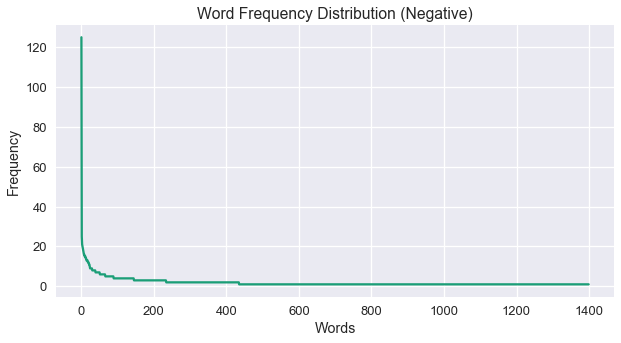

In [146]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

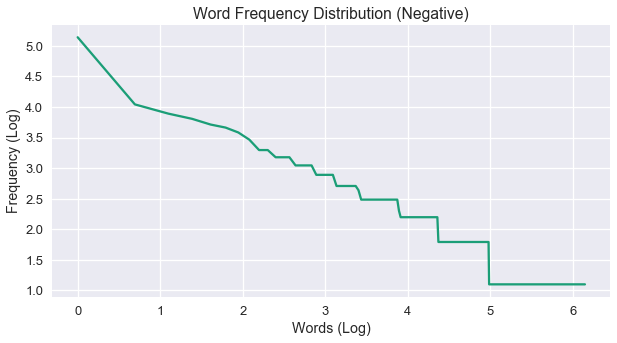

In [147]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()